In [1]:
import scipy.io
import numpy as np
import CMR_IA as cmr
import matplotlib.pyplot as plt
import pickle
from statistics import mean, stdev
import pprint
# import import_ipynb
import time
import pandas as pd
import seaborn as sns

In [2]:
with open("../Data/simuS1_group3_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

In [3]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [4]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.3,
    beta_cue = 0.4,
    beta_rec = 0,
    beta_rec_new = 0.1, # beta for retrieved item
    beta_rec_post = 0.1,
    gamma_fc = 0.2,
    gamma_cf = 0.2,
    s_fc = 0.2,
    s_cf = 0.2,
    c_thresh = 0.3,
    c_thresh_ass = 0.70,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
    kappa = 0,
    lamb = 0,
    eta = 0,
    phi_s = 1,
    phi_d = 0.6,
    nitems_in_accumulator = 136,
    d_ass = 1,
    learn_while_retrieving = True,
    omega = 3,
    alpha = 1,
    var_enc = 0.8,
    bad_enc_ratio = 0.5,
)
params

{'beta_enc': 0.5,
 'beta_rec': 0,
 'beta_cue': 0.5,
 'beta_rec_new': 0.1,
 'beta_rec_post': 0.1,
 'beta_distract': None,
 'phi_s': 1,
 'phi_d': 0.6,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0,
 'eta': 0,
 'omega': 3,
 'alpha': 1,
 'c_thresh': 0.3,
 'c_thresh_ass': 0.7,
 'd_ass': 1,
 'lamb': 0,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 136,
 'max_recalls': 50,
 'learn_while_retrieving': True,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 1,
 'c1': 0,
 'No_recall': None,
 'var_enc': 0.8,
 'bad_enc_ratio': 0.5,
 'gamma_fc': 0.5,
 'gamma_cf': 0.5}

In [5]:
df_study = df_study.loc[df_study.session == 0]
# df_study = df_study.loc[df_study.session == 0].iloc[0:5]
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,session,pair_idx
0,186,279,BUFFALO,CHAMPION,0,0
1,255,776,CASKET,KIDNEY,0,1
2,938,1259,NAVIGATOR,SEA,0,2
3,582,1115,FLORIDA,POTATO,0,3
4,224,694,CAMERA,HAYSTACK,0,4
5,1343,461,SOFTBALL,DICE,0,5
6,742,898,INTESTINE,MINT,0,6
7,1165,619,RAM,GANG,0,7
8,1321,1478,SKUNK,TOMBSTONE,0,8
9,1489,566,TOWEL,FIN,0,9


In [6]:
df_test = df_test.loc[df_test.session == 0]
# df_test = pd.DataFrame()
# df_test['test_itemno1'] = [581,745,710,581,1087]
# df_test['test_itemno2'] = [634,147,1087,-1,-1]
# df_test['correct_ans'] = [1,0,1,634,710]
# df_test['session'] = 0
# df_test['test'] = [1] * 3 + [2] * 2
df_test

,test_itemno1,test_itemno2,test_item1,correct_ans,order,pair_idx,test,session
0,691,-1,HATCHET,1,0,14,1,0
1,924,-1,MOUNTAIN,1,0,39,1,0
2,1392,-1,STREAM,1,0,19,1,0
3,1365,-1,STAFF,0,-1,-1,1,0
4,760,-1,JOURNAL,0,-1,-1,1,0
...,...,...,...,...,...,...,...,...
115,498,-1,DRINK,511,0,17,2,0
116,1052,-1,PERSON,924,1,39,2,0
117,1577,-1,VOLUNTEER,130,1,38,2,0
118,1343,-1,SOFTBALL,461,0,5,2,0


In [7]:
test1_num = sum(df_test.test == 1)
test1_num

80

In [8]:
df_thin = df_test[['session','test_itemno1','test_itemno2']]
df_thin = df_thin.assign(s_resp=np.nan, s_rt=np.nan)
df_thin

,session,test_itemno1,test_itemno2,s_resp,s_rt
0,0,691,-1,NaN,NaN
1,0,924,-1,NaN,NaN
2,0,1392,-1,NaN,NaN
3,0,1365,-1,NaN,NaN
4,0,760,-1,NaN,NaN
...,...,...,...,...,...
115,0,498,-1,NaN,NaN
116,0,1052,-1,NaN,NaN
117,0,1577,-1,NaN,NaN
118,0,1343,-1,NaN,NaN


In [9]:
# extarct the session data
sess = 0
pres_mat = df_study.loc[df_study.session == sess, ['study_itemno1', 'study_itemno2']].to_numpy()
pres_mat = np.reshape(pres_mat, (1, -1, 2))
pres_mat

array([[[ 186,  279],
        [ 255,  776],
        [ 938, 1259],
        [ 582, 1115],
        [ 224,  694],
        [1343,  461],
        [ 742,  898],
        [1165,  619],
        [1321, 1478],
        [1489,  566],
        [1442,  661],
        [ 975,  893],
        [ 852, 1171],
        [1283, 1421],
        [ 691, 1292],
        [1071,   69],
        [1586,  767],
        [ 498,  511],
        [1325, 1278],
        [1392,  135],
        [ 730,  686],
        [1064,  727],
        [ 149, 1275],
        [1113,  739],
        [1335,  905],
        [1415,  522],
        [1067, 1527],
        [1295, 1628],
        [1435, 1083],
        [1020, 1385],
        [1256, 1516],
        [1209,  780],
        [ 574, 1181],
        [1086,  349],
        [1060,   12],
        [ 818,  751],
        [1252, 1585],
        [ 305,  616],
        [ 130, 1577],
        [ 924, 1052],
        [ 227,  853],
        [ 984,  763],
        [ 142,  921],
        [ 427,  549],
        [1564,  384],
        [1

In [10]:
cue_mat = df_thin.loc[df_thin.session == sess, ['test_itemno1','test_itemno2']].to_numpy()
# cue_mat = np.reshape(cue_mat,(1,-1))
cue_mat

array([[ 691,   -1],
       [ 924,   -1],
       [1392,   -1],
       [1365,   -1],
       [ 760,   -1],
       [ 905,   -1],
       [ 359,   -1],
       [1283,   -1],
       [ 644,   -1],
       [1281,   -1],
       [1527,   -1],
       [ 279,   -1],
       [ 836,   -1],
       [ 303,   -1],
       [ 680,   -1],
       [1343,   -1],
       [ 693,   -1],
       [ 975,   -1],
       [ 797,   -1],
       [ 767,   -1],
       [ 497,   -1],
       [1089,   -1],
       [1302,   -1],
       [ 205,   -1],
       [1137,   -1],
       [1161,   -1],
       [ 739,   -1],
       [ 776,   -1],
       [1266,   -1],
       [1478,   -1],
       [  61,   -1],
       [ 780,   -1],
       [ 349,   -1],
       [ 241,   -1],
       [ 653,   -1],
       [1222,   -1],
       [1628,   -1],
       [  99,   -1],
       [ 143,   -1],
       [ 106,   -1],
       [1247,   -1],
       [1549,   -1],
       [ 661,   -1],
       [ 498,   -1],
       [1585,   -1],
       [ 582,   -1],
       [1259,   -1],
       [1071,

In [11]:
sem_mat = s_mat

In [12]:
model = cmr.CMR2(params, pres_mat, sem_mat, source_mat=None,
           rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task='Success', mode='Recog-CR',test1_num=test1_num)

In [13]:
model.pres_nos

array([[[ 186,  279],
        [ 255,  776],
        [ 938, 1259],
        [ 582, 1115],
        [ 224,  694],
        [1343,  461],
        [ 742,  898],
        [1165,  619],
        [1321, 1478],
        [1489,  566],
        [1442,  661],
        [ 975,  893],
        [ 852, 1171],
        [1283, 1421],
        [ 691, 1292],
        [1071,   69],
        [1586,  767],
        [ 498,  511],
        [1325, 1278],
        [1392,  135],
        [ 730,  686],
        [1064,  727],
        [ 149, 1275],
        [1113,  739],
        [1335,  905],
        [1415,  522],
        [1067, 1527],
        [1295, 1628],
        [1435, 1083],
        [1020, 1385],
        [1256, 1516],
        [1209,  780],
        [ 574, 1181],
        [1086,  349],
        [1060,   12],
        [ 818,  751],
        [1252, 1585],
        [ 305,  616],
        [ 130, 1577],
        [ 924, 1052],
        [ 227,  853],
        [ 984,  763],
        [ 142,  921],
        [ 427,  549],
        [1564,  384],
        [1

In [14]:
model.cues_indexes

array([[ 46,  -1],
       [ 70,  -1],
       [118,  -1],
       [116,  -1],
       [ 55,  -1],
       [ 67,  -1],
       [ 25,  -1],
       [108,  -1],
       [ 41,  -1],
       [107,  -1],
       [127,  -1],
       [ 19,  -1],
       [ 62,  -1],
       [ 21,  -1],
       [ 44,  -1],
       [115,  -1],
       [ 47,  -1],
       [ 72,  -1],
       [ 60,  -1],
       [ 57,  -1],
       [ 31,  -1],
       [ 86,  -1],
       [111,  -1],
       [ 14,  -1],
       [ 90,  -1],
       [ 92,  -1],
       [ 52,  -1],
       [ 58,  -1],
       [104,  -1],
       [123,  -1],
       [  1,  -1],
       [ 59,  -1],
       [ 24,  -1],
       [ 17,  -1],
       [ 42,  -1],
       [ 98,  -1],
       [134,  -1],
       [  3,  -1],
       [  9,  -1],
       [  4,  -1],
       [ 99,  -1],
       [128,  -1],
       [ 43,  -1],
       [ 32,  -1],
       [132,  -1],
       [ 38,  -1],
       [102,  -1],
       [ 83,  -1],
       [ 49,  -1],
       [ 37,  -1],
       [  6,  -1],
       [ 10,  -1],
       [ 29,

In [15]:
model.pres_indexes

array([[[ 12,  19],
        [ 18,  58],
        [ 71, 102],
        [ 38,  89],
        [ 15,  48],
        [115,  30],
        [ 53,  66],
        [ 93,  40],
        [112, 123],
        [124,  36],
        [122,  43],
        [ 72,  65],
        [ 63,  94],
        [108, 120],
        [ 46, 109],
        [ 83,   2],
        [133,  57],
        [ 32,  33],
        [113, 106],
        [118,   7],
        [ 51,  45],
        [ 81,  50],
        [ 10, 105],
        [ 88,  52],
        [114,  67],
        [119,  34],
        [ 82, 127],
        [110, 134],
        [121,  84],
        [ 76, 117],
        [101, 126],
        [ 97,  59],
        [ 37,  95],
        [ 85,  24],
        [ 80,   0],
        [ 61,  54],
        [100, 132],
        [ 22,  39],
        [  6, 131],
        [ 70,  78],
        [ 16,  64],
        [ 73,  56],
        [  8,  69],
        [ 28,  35],
        [130,  26],
        [ 91,  11],
        [ 68,  75],
        [ 96,  87]]], dtype=int64)

In [16]:
model.nlists

1

In [17]:
model.ndistractors

3

In [18]:
model.nitems_unique

136

In [19]:
model.run_success_single_sess()

# in model:
# print(self.att_vec[self.all_nos_unique[item_idx]-1])
# print(np.dot(self.c_old[:self.nitems_unique], self.f[:self.nitems_unique].T))

False
False
True
False
False
True
False
False
False
False
False
True
False
True
False
False
False
False
True
False
False
False
True
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
True
True
False
False


In [20]:
model.ret_thresh

array([4., 1., 4., 1., 1., 1., 4., 4., 1., 1., 4., 1., 4., 1., 1., 1., 4.,
       1., 4., 4., 1., 1., 4., 1., 4., 1., 1., 1., 1., 1., 4., 1., 4., 4.,
       1., 1., 4., 4., 1., 4., 4., 1., 1., 4., 1., 1., 4., 1., 4., 1., 4.,
       4., 4., 4., 4., 1., 1., 4., 4., 4., 1., 4., 1., 1., 4., 1., 4., 1.,
       1., 1., 4., 1., 4., 1., 1., 1., 4., 1., 4., 1., 4., 4., 4., 4., 1.,
       4., 1., 1., 4., 4., 1., 1., 1., 4., 4., 4., 1., 4., 1., 1., 4., 1.,
       4., 1., 1., 4., 4., 1., 4., 4., 1., 1., 4., 4., 4., 4., 1., 1., 1.,
       4., 4., 4., 4., 4., 4., 1., 4., 4., 1., 1., 1., 4., 4., 4., 4., 1.],
      dtype=float32)

In [21]:
# model.rec_items

In [22]:
# model.rec_times

In [23]:
# model.f_in_acc

<Axes: >

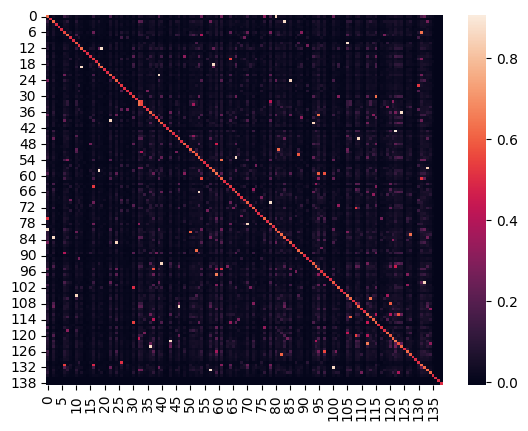

In [24]:
sns.heatmap(model.M_FC)

<Axes: >

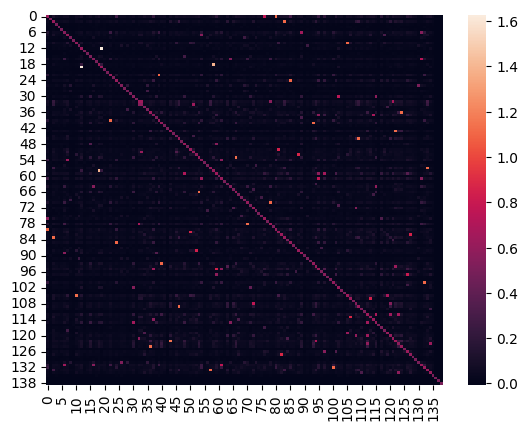

In [25]:
sns.heatmap(model.M_CF)

In [26]:
recs = model.rec_items
rts = model.rec_times
result = np.column_stack((recs,rts))
df_thin.loc[df_thin.session==sess, ['s_resp','s_rt']] = result
df_thin['test'] = df_test['test']
df_simu = df_thin.merge(df_test,on=['session','test_itemno1','test_itemno2','test'])
df_simu['correct'] = df_simu['s_resp'] == df_simu['correct_ans']
df_simu['csim'] = model.recog_similarity
df_simu

,session,test_itemno1,test_itemno2,s_resp,s_rt,test,test_item1,correct_ans,order,pair_idx,correct,csim
0,0,691,-1,1.0,2794.215576,1,HATCHET,1,0,14,True,0.300966
1,0,924,-1,1.0,2144.518555,1,MOUNTAIN,1,0,39,True,0.424628
2,0,1392,-1,1.0,2701.238525,1,STREAM,1,0,19,True,0.316780
3,0,1365,-1,0.0,1628.207153,1,STAFF,0,-1,-1,True,0.046664
4,0,760,-1,0.0,1731.925659,1,JOURNAL,0,-1,-1,True,0.075521
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,498,-1,1052.0,2360.000000,2,DRINK,511,0,17,False,0.460427
116,0,1052,-1,924.0,1400.000000,2,PERSON,924,1,39,True,0.779742
117,0,1577,-1,227.0,1930.000000,2,VOLUNTEER,130,1,38,False,0.577922
118,0,1343,-1,853.0,2110.000000,2,SOFTBALL,461,0,5,False,0.532391


In [27]:
# get f_in
df_tmp = df_study.loc[df_study.session == sess]
tmp1 = df_tmp.study_itemno1.to_numpy()
tmp2 = df_tmp.study_itemno2.to_numpy()
df_tmp2 = df_test.loc[df_test.session == sess]
tmp3 = df_tmp2.test_itemno1[df_tmp2.test_itemno1 >= 0].to_numpy()
tmp4 = df_tmp2.test_itemno2[df_tmp2.test_itemno2 >= 0].to_numpy()
tmp = np.concatenate((tmp1, tmp2, tmp3, tmp4))
tmp = np.unique(tmp)  # sort

test1_num = 80
f_in_dif = model.f_in_dif

tmp_corr = df_simu.loc[df_simu.session == sess,"correct_ans"][test1_num:]
corrid = np.searchsorted(tmp, tmp_corr)

corr_fin = [f_in_dif[i][id] for i, id in enumerate(corrid)]
omax_fin = [np.max(np.delete(f_in_dif[i], id)) for i, id in enumerate(corrid)]
omean_fin = [np.mean(np.delete(f_in_dif[i], id)) for i, id in enumerate(corrid)]
df_simu['corr_fin'] = [-1] * test1_num + corr_fin
df_simu['omax_fin'] = [-1] * test1_num + omax_fin
df_simu['omean_fin'] = [-1] * test1_num + omean_fin
df_simu

,session,test_itemno1,test_itemno2,s_resp,s_rt,test,test_item1,correct_ans,order,pair_idx,correct,csim,corr_fin,omax_fin,omean_fin
0,0,691,-1,1.0,2794.215576,1,HATCHET,1,0,14,True,0.300966,-1.000000,-1.000000,-1.000000
1,0,924,-1,1.0,2144.518555,1,MOUNTAIN,1,0,39,True,0.424628,-1.000000,-1.000000,-1.000000
2,0,1392,-1,1.0,2701.238525,1,STREAM,1,0,19,True,0.316780,-1.000000,-1.000000,-1.000000
3,0,1365,-1,0.0,1628.207153,1,STAFF,0,-1,-1,True,0.046664,-1.000000,-1.000000,-1.000000
4,0,760,-1,0.0,1731.925659,1,JOURNAL,0,-1,-1,True,0.075521,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,498,-1,1052.0,2360.000000,2,DRINK,511,0,17,False,0.460427,-3.051372,-0.575874,-1.981847
116,0,1052,-1,924.0,1400.000000,2,PERSON,924,1,39,True,0.779742,-0.282459,-0.511170,-2.039304
117,0,1577,-1,227.0,1930.000000,2,VOLUNTEER,130,1,38,False,0.577922,-2.995328,-0.480956,-2.055680
118,0,1343,-1,853.0,2110.000000,2,SOFTBALL,461,0,5,False,0.532391,-3.150359,-0.525489,-2.056962


In [28]:
df_simu.iloc[80:]

,session,test_itemno1,test_itemno2,s_resp,s_rt,test,test_item1,correct_ans,order,pair_idx,correct,csim,corr_fin,omax_fin,omean_fin
80,0,1516,-1,1209.0,1860.0,2,TUBE,1256,1,30,False,0.568766,-0.566978,-0.460611,-0.803756
81,0,694,-1,780.0,1870.0,2,HAYSTACK,224,1,4,False,0.565126,-0.617975,-0.464953,-0.831738
82,0,1171,-1,1442.0,2100.0,2,RAZOR,852,1,12,False,0.509647,-0.557620,-0.521801,-0.858177
83,0,780,-1,1181.0,1800.0,2,KITTEN,1209,1,31,False,0.589358,-2.901912,-0.444023,-0.853364
84,0,1442,-1,661.0,1410.0,2,TEAPOT,661,0,10,True,0.762525,-0.288463,-0.465266,-0.885106
85,0,1335,-1,574.0,2040.0,2,SNOB,905,0,24,False,0.525865,-0.574379,-0.508178,-0.929482
86,0,1415,-1,1275.0,2170.0,2,SUSPECT,522,0,25,False,0.501247,-0.537883,-0.538933,-0.983107
87,0,1086,-1,349.0,1370.0,2,PLATE,349,0,33,True,0.802088,-0.267525,-0.456887,-1.012120
88,0,1071,-1,69.0,1370.0,2,PIMPLE,69,0,15,True,0.784742,-0.267722,-0.461839,-1.045751
89,0,1020,-1,12.0,2050.0,2,PASSENGER,1385,0,29,False,0.527462,-0.531920,-0.512045,-1.098215


In [29]:
corrid # 1234: 137

array([101,  15,  63,  97,  43,  67,  34,  24,   2, 117, 127,  57,  93,
        58,  53,  80, 100, 118, 109,  45,  84, 113,  22,  37,  38,  65,
        36, 108, 110,  71,  19,  10,  52, 123,  54,  33,  70,   6,  30,
        81], dtype=int64)

In [30]:
model.rec_items[80:]

[1209,
 780,
 1442,
 1181,
 661,
 574,
 1275,
 349,
 69,
 12,
 1527,
 767,
 1165,
 776,
 742,
 1060,
 1252,
 751,
 1292,
 511,
 498,
 1325,
 305,
 818,
 130,
 1283,
 566,
 1321,
 1478,
 461,
 279,
 149,
 739,
 1343,
 1577,
 1052,
 924,
 227,
 853,
 1064]

In [31]:
model.f_in_dif[-1]

array([-3.1778603 , -0.98204255, -3.3940785 , -0.9138942 , -0.9258565 ,
       -0.9490893 , -3.205699  , -3.492443  , -0.80304503, -0.97473574,
       -3.2871697 , -0.76135945, -3.6250832 , -0.97028   , -0.93056184,
       -0.77556884, -3.2354555 , -0.91390496, -3.6017365 , -3.6471317 ,
       -0.91871935, -0.9462124 , -3.2949462 , -0.9408911 , -3.4104078 ,
       -0.9365347 , -0.629406  , -0.9272108 , -0.79950964, -0.93129516,
       -3.2962747 , -0.9503692 , -3.077326  , -3.3163757 , -0.7696023 ,
       -0.7531201 , -3.3789697 , -3.3950496 , -0.822049  , -3.304655  ,
       -3.4543972 , -0.8922503 , -0.9690039 , -3.3927631 , -0.9333969 ,
       -0.68756366, -3.4007714 , -0.90630865, -3.5876114 , -0.9243274 ,
       -3.5285268 , -3.468825  , -3.4989038 , -3.443852  , -3.3018007 ,
       -0.9603203 , -0.76149815, -3.41328   , -3.6044521 , -3.169792  ,
       -0.90387607, -3.0292265 , -0.95848125, -0.7610289 , -3.216302  ,
       -0.7647674 , -3.4387918 , -0.7507083 , -0.75410557, -0.75

In [32]:
model.f_in_acc[-1]

array([0.8221396 , 0.01795748, 0.6059215 , 0.08610584, 0.07414351,
       0.05091068, 0.794301  , 0.5075568 , 0.19695495, 0.02526426,
       0.71283036, 0.23864058, 0.37491688, 0.02972004, 0.06943817,
       0.22443116, 0.76454437, 0.08609504, 0.3982634 , 0.35286838,
       0.08128066, 0.05378756, 0.7050539 , 0.05910891, 0.5895922 ,
       0.0634653 , 0.37059402, 0.07278921, 0.20049036, 0.06870483,
       0.70372546, 0.04963084, 0.9226739 , 0.6836244 , 0.23039773,
       0.24687988, 0.6210302 , 0.60495037, 0.177951  , 0.6953448 ,
       0.5456029 , 0.10774969, 0.03099608, 0.6072369 , 0.06660314,
       0.31243634, 0.5992286 , 0.09369134, 0.41238856, 0.07567265,
       0.47147334, 0.5311749 , 0.50109625, 0.55614805, 0.6981994 ,
       0.03967968, 0.23850183, 0.58672   , 0.3955479 , 0.8302081 ,
       0.09612393, 0.9707735 , 0.04151873, 0.23897108, 0.7836982 ,
       0.23523259, 0.56120837, 0.2492917 , 0.24589443, 0.2452985 ,
       0.7967499 , 0.16558883, 0.45199364, 0.23947087, 0.10428

In [33]:
model.ret_thresh[120]

4.0

In [34]:
model.all_nos_unique[120]

1421

In [35]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,session,pair_idx
0,186,279,BUFFALO,CHAMPION,0,0
1,255,776,CASKET,KIDNEY,0,1
2,938,1259,NAVIGATOR,SEA,0,2
3,582,1115,FLORIDA,POTATO,0,3
4,224,694,CAMERA,HAYSTACK,0,4
5,1343,461,SOFTBALL,DICE,0,5
6,742,898,INTESTINE,MINT,0,6
7,1165,619,RAM,GANG,0,7
8,1321,1478,SKUNK,TOMBSTONE,0,8
9,1489,566,TOWEL,FIN,0,9
